# Data 620: Week 6 Assignment 
### Aaron Grzasko
### 10/7/2018

## Assignment Overview

In this assignment, we will load and analyze the *Davis Southern Club Women* dataset.  The data were recorded in the 1930s, and contain the following elements:
* The names of 18 Southern women.
* A list of 14 social events, labeled "E1" through "E14".
* An indication of which social events each woman attended.

The structure of this dataset can be represented as a bipartite graph, with the following two node types:  women and events.  Edges connecting the two node types can be used to indicate whether a woman attended a particular event.  

Please refer to the References section for more information.

## Read Data

First, let's load the relevant python libraries for the assignment:

In [1]:
# plot graphs inline in notebook
%matplotlib inline

# load libraries
import urllib.request
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

Now we'll read in the data directly from the website specified in the assignment instructions.

In [2]:
# download data from web
url = 'http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/davis.dat'
urllib.request.urlretrieve(url,'davis.dat' )

# assign row and column names, using data provided in the .dat file 
row_names = np.genfromtxt('davis.dat', dtype=None, delimiter=',', \
                          encoding=None, skip_header=4)[0:18]
col_names = np.genfromtxt('davis.dat', dtype=None, delimiter=',', \
                          encoding=None, skip_header=23)[0:14]

# read in data matrix as pandas dataframe
df = pd.read_csv('davis.dat', skiprows = 38, delimiter = ' ', \
                 header=None, names=col_names)
df = df.set_index(row_names)

# print dimensions of dataframe
df.shape

(18, 14)

There are 18 rows, with each row providing information about a unique southern women.

Each of the 14 columns are used to represent a particular social event.  

Here is a view of the entire dataset:

In [3]:
df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
EVELYN,1,1,1,1,1,1,0,1,1,0,0,0,0,0
LAURA,1,1,1,0,1,1,1,1,0,0,0,0,0,0
THERESA,0,1,1,1,1,1,1,1,1,0,0,0,0,0
BRENDA,1,0,1,1,1,1,1,1,0,0,0,0,0,0
CHARLOTTE,0,0,1,1,1,0,1,0,0,0,0,0,0,0
FRANCES,0,0,1,0,1,1,0,1,0,0,0,0,0,0
ELEANOR,0,0,0,0,1,1,1,1,0,0,0,0,0,0
PEARL,0,0,0,0,0,1,0,1,1,0,0,0,0,0
RUTH,0,0,0,0,1,0,1,1,1,0,0,0,0,0
VERNE,0,0,0,0,0,0,1,1,1,0,0,1,0,0


The dataframe is in the form of an 18 x 4 adjacency matrix:
* values of 1 indicate attendance at a social event
* values of 0 are used to indicate a woman's absence from a given event


## Graphs

Using the data stored in our DataFrame, we can create a graph object.

In [4]:
# initialize graph
G = nx.Graph()

# add nodes for each partition: women and events
G.add_nodes_from(row_names, bipartite='women')
G.add_nodes_from(col_names, bipartite='events')

# create edges; load to graph
edges = [(row_names[row], col_names[col]) for row in \
         range(df.shape[0]) for col in range(df.shape[1]) \
         if df.iloc[row,col] == 1]
G.add_edges_from(edges)

### Bipartite Representation

Here is a visual representation of the bipartite graph object:

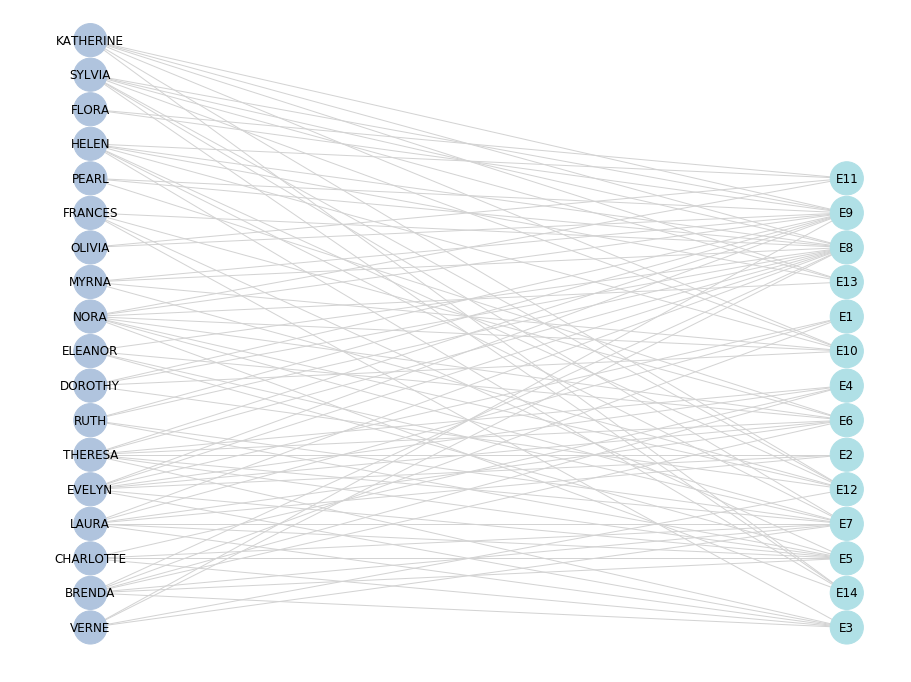

In [5]:
# specify position of nodes for visual presentation of bipartite graph
# used stackoverflow for assistance--see Reference section
X, Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) 
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) 

# list of bipartite partition category (i.e. women/event) for each node
c = [d['bipartite'] for n,d in G.nodes(data=True)]

# specify separate colors for each node type
col_values = ['lightsteelblue' if i== 'women' else 'powderblue' for i in c]

# draw bipartite graph
plt.figure(figsize=(12,9)) 
nx.draw(G, pos=pos, with_labels=True, node_color = col_values, \
        edge_color='lightgray', node_size = 1100)
plt.show()

It is clear from this graph that each woman attended multiple social events, and each social event was attended by multiple women.  

Here are some initial observations: 
* Olivia and Flora attended fewer events than the other women, with each attending only two events.
* Laura, Nora, Theresa, Brenda, Evelyn, Helen, and Sylvia attended many events vis-a-vis their peers.  
* Events E5, E6, E7, E8, and E9 appear to be very well attended compared to other social get-togethers.
* Events E1, E2, E4, E11, and E13 were had poor attendance among the 18 women.  

Let's review the sorted degree centrality for the nodes representing women:

In [6]:
# calculate women degree centrality in bipartite graph
sorted([(k,round(v,3)) for k,v in nx.degree_centrality(G).items() \
        if G.node[k]['bipartite'] == 'women'],
       key= lambda z: z[1], reverse=True)

[('EVELYN', 0.258),
 ('THERESA', 0.258),
 ('NORA', 0.258),
 ('LAURA', 0.226),
 ('BRENDA', 0.226),
 ('SYLVIA', 0.226),
 ('HELEN', 0.226),
 ('KATHERINE', 0.194),
 ('CHARLOTTE', 0.129),
 ('FRANCES', 0.129),
 ('ELEANOR', 0.129),
 ('RUTH', 0.129),
 ('VERNE', 0.129),
 ('MYRNA', 0.129),
 ('DOROTHY', 0.129),
 ('PEARL', 0.097),
 ('OLIVIA', 0.065),
 ('FLORA', 0.065)]

These results are consistent with our initial observations.  The top 8 women in terms of degree centrality measures are significantly more connected (i.e. have attended more social events) than the other women. 

Flora, Olivia, and Pearl have attended the fewest social events, and therefore have the lowest degree centrality scores.


Let's move on and calculate degree centrality for the events nodes:

In [7]:
# calculate events degree centrality in bipartite graph
sorted([(k,round(v,3)) for k,v in nx.degree_centrality(G).items() \
        if G.node[k]['bipartite'] == 'events'],
       key= lambda z: z[1], reverse=True)

[('E8', 0.452),
 ('E9', 0.387),
 ('E7', 0.323),
 ('E5', 0.258),
 ('E6', 0.258),
 ('E12', 0.226),
 ('E3', 0.194),
 ('E10', 0.194),
 ('E4', 0.129),
 ('E11', 0.129),
 ('E13', 0.129),
 ('E14', 0.129),
 ('E1', 0.097),
 ('E2', 0.097)]

From the degree centrality measures, we see that Event 8 was by the far the most well-attended event among the 18 women, followed by Events 8 and 9.  There is a significant drop-off of degree centrality after top three measures.  

As mentioned earlier, Events 1 and 2 were the least popular social events in term of the number of women attending, and this is indicated by the lowe degree centrality measure.

### Unipartite Representation

We can represent the original bipartite graph as a unipartite graph, using bipartite network projection.

**Women Unipartite Graph**  
Below is a unipartite graph featuring the women nodes only.  Edges indicate whether a pair of women attended the same social function.  The edges are also weighted to indicate the total number of social functions each women both attended.

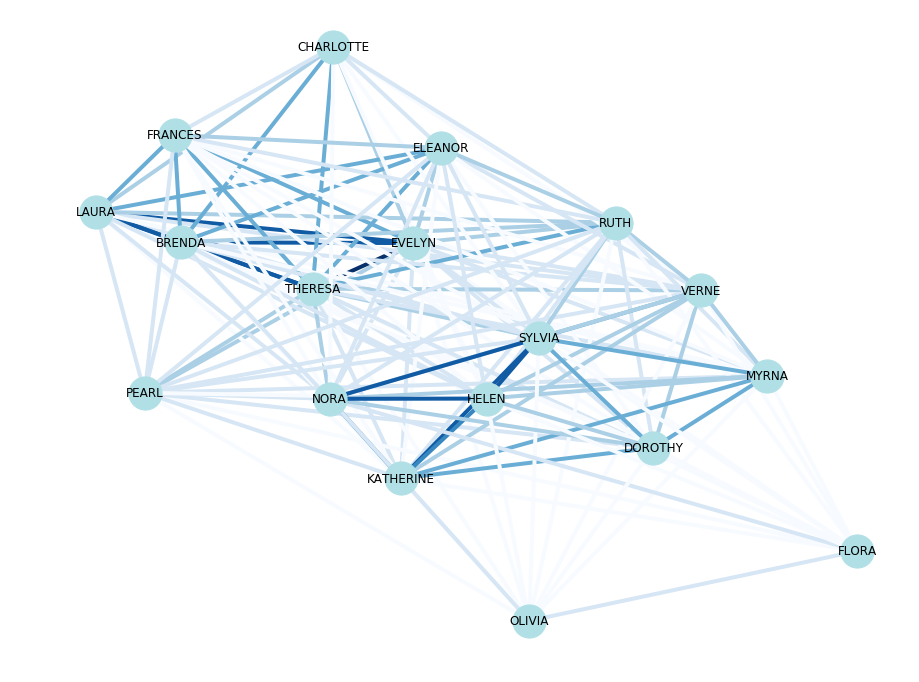

In [12]:
# isoloate women nodes only
women_nodes = []
for n in G.nodes():
    if G.node[n]['bipartite'] == 'women':
        women_nodes.append(n)

# create graph object with women only
G_women = bipartite.weighted_projected_graph(G, women_nodes )

# edge weights are equal to number of events attended by each female pairs
weights = [G_women[u][v]['weight'] for u,v in G_women.edges()]

# draw projected graph
plt.figure(figsize=(12,9))
nx.draw(G_women, with_labels=True, pos= nx.spring_layout(G_women), \
        node_color='powderblue', \
        node_size = 1100, edge_color=weights, \
        edge_cmap=plt.cm.Blues, width=4)
plt.show()

There appears to be a very strong social connections between two different sets of women:

* Laura, Brenda, Theresa, and Evelyn have attended 6 or more events together.  There are also other women that appear to be significantly connected to this group, including Frances, Eleanor, Charlotte, and Ruth.  


* Sylvia, Helen, and Nora have all attended 6 or more events together.  Other women connected to this group include Myrna, Katherine, and Dorothy. 

Flora and Olvia appear to be relatively isolated from the rest of the group, with moderately strong connections with each other and Nora.

Below are some basic graph metrics:

In [13]:
# number of edges
print("number of edges: " + str(G_women.number_of_edges()))

# number of nodes
print("\nnumber of nodes: " + str(G_women.number_of_nodes()))

# graph diameter
print("\ngraph diameter: " + str(nx.diameter(G_women)))

# weighted degree statistics
deg=[nx.degree(G_women, weight='weight')[n] for n in women_nodes]
print("\nminimum graph degree: " + str(min(deg)))
print("\nmaxmum graph degree: " + str(max(deg)))


number of edges: 139

number of nodes: 18

graph diameter: 2

minimum graph degree: 14

maxmum graph degree: 57


While there is significant variation in the weighted degrees by node, the graph is closely connected overall, with a graph diameter of 2.  Note:  Theresa has the highest weighted degree count overall, at 57.

In [14]:
# print weighted degrees
deg_dict = {n:nx.degree(G_women, weight='weight')[n] for n in women_nodes}
[(k,round(deg_dict[k],3)) for k in sorted(deg_dict, key=deg_dict.get, reverse=True)]


[('THERESA', 57),
 ('EVELYN', 50),
 ('SYLVIA', 50),
 ('NORA', 47),
 ('BRENDA', 46),
 ('LAURA', 45),
 ('HELEN', 42),
 ('KATHERINE', 41),
 ('RUTH', 40),
 ('VERNE', 39),
 ('ELEANOR', 36),
 ('MYRNA', 35),
 ('DOROTHY', 35),
 ('FRANCES', 32),
 ('PEARL', 31),
 ('CHARLOTTE', 24),
 ('OLIVIA', 14),
 ('FLORA', 14)]

In general, the graph exhibits high closeness centrality measures:

In [15]:
# calculate closeness centrality
c = nx.closeness_centrality(G_women)
[(k,round(c[k],3)) for k in sorted(c, key=c.get, reverse=True)]

[('EVELYN', 1.0),
 ('THERESA', 1.0),
 ('RUTH', 1.0),
 ('VERNE', 1.0),
 ('SYLVIA', 1.0),
 ('NORA', 1.0),
 ('HELEN', 1.0),
 ('PEARL', 0.944),
 ('MYRNA', 0.944),
 ('KATHERINE', 0.944),
 ('DOROTHY', 0.944),
 ('LAURA', 0.895),
 ('BRENDA', 0.895),
 ('FRANCES', 0.895),
 ('ELEANOR', 0.895),
 ('OLIVIA', 0.773),
 ('FLORA', 0.773),
 ('CHARLOTTE', 0.739)]

Let's identify the boundary spanners:

In [16]:
# calculate betweenness centrality
b = nx.betweenness_centrality(G_women)
[(k,round(b[k],3)) for k in sorted(b, key=b.get, reverse=True)]

[('EVELYN', 0.01),
 ('THERESA', 0.01),
 ('RUTH', 0.01),
 ('VERNE', 0.01),
 ('SYLVIA', 0.01),
 ('NORA', 0.01),
 ('HELEN', 0.01),
 ('PEARL', 0.005),
 ('MYRNA', 0.005),
 ('KATHERINE', 0.005),
 ('DOROTHY', 0.005),
 ('LAURA', 0.003),
 ('BRENDA', 0.003),
 ('FRANCES', 0.003),
 ('ELEANOR', 0.003),
 ('CHARLOTTE', 0.0),
 ('OLIVIA', 0.0),
 ('FLORA', 0.0)]

Betweenness centrality measure are very low across all nodes; so there are no significant bottlenecks in the network.

We can now look for gray cardinals by reviewing eigenvector centrality measures:

In [17]:
# calculate eigenvector centrality
e = nx.eigenvector_centrality(G_women)
[(k,round(e[k],3)) for k in sorted(e, key=e.get, reverse=True)]

[('EVELYN', 0.254),
 ('THERESA', 0.254),
 ('RUTH', 0.254),
 ('VERNE', 0.254),
 ('SYLVIA', 0.254),
 ('NORA', 0.254),
 ('HELEN', 0.254),
 ('PEARL', 0.243),
 ('MYRNA', 0.243),
 ('KATHERINE', 0.243),
 ('DOROTHY', 0.243),
 ('LAURA', 0.231),
 ('BRENDA', 0.231),
 ('FRANCES', 0.231),
 ('ELEANOR', 0.231),
 ('OLIVIA', 0.188),
 ('FLORA', 0.188),
 ('CHARLOTTE', 0.173)]

We see nothing new here.  There are no gray cardinals in the dataset:  women with low degree measures, but high eigenvector centrality scores.

Finally, let's identify cliques within the women's unipartite graph.  We'll use a slightly modified version of the *trim_edges()* function from the SNA book (page 64) to pair down the number of potential cliques. 

In [18]:
# trim graph function to only include edges in graph above specified weight
def trim_edges( g, weight = 1):
    g2 = nx.Graph()
    for f, to, edata in g.edges( data = True):
        if edata['weight'] > weight:
            g2.add_weighted_edges_from([(f, to, edata)])
    return g2

G_women_trim = trim_edges(G_women,4)

# return cliques from trimmed graph
print('list of cliques:')
print(list(nx.find_cliques(G_women_trim)))

list of cliques:
[['BRENDA', 'EVELYN', 'THERESA', 'LAURA'], ['NORA', 'SYLVIA', 'KATHERINE', 'HELEN']]


We see two cliques, with unique membership to each clique.  These cliques are visible in the drawing of the unipartite graph above.

**Events Unipartite Graph**

Below is a unipartite graph using the event nodes only.  An edge between two nodes indicates that at least one woman attended both events represented by the node pair.  Edges are weighted to represent the number of women attending both events.

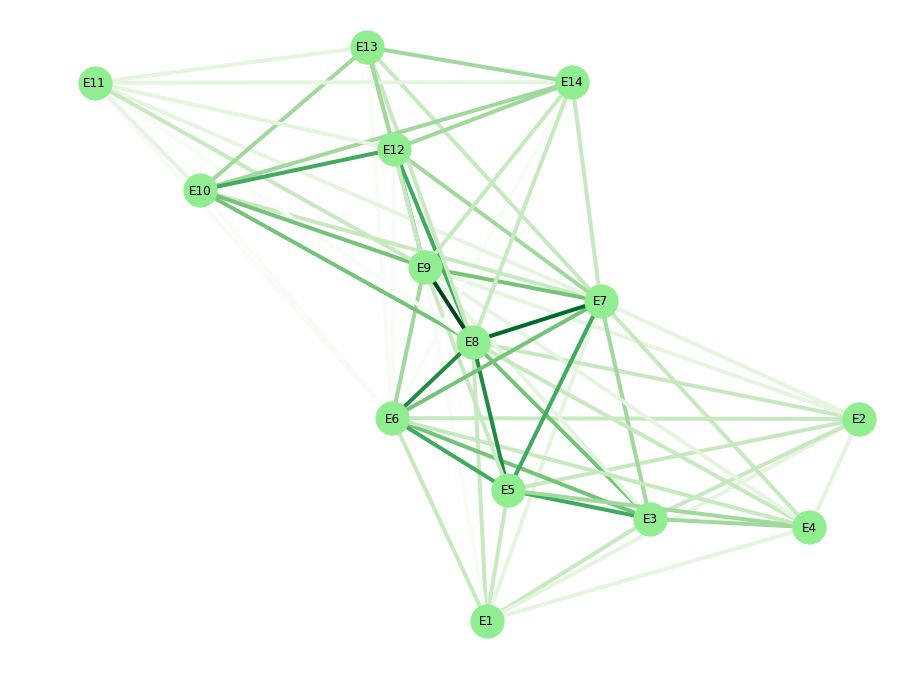

In [19]:
# isoloate event nodes only
event_nodes = []
for n in G.nodes():
    if G.node[n]['bipartite'] == 'events':
        event_nodes.append(n)

# create graph object with events only
G_events = bipartite.weighted_projected_graph(G, event_nodes)

# edge weights are equal to number of women that attended both events in a given event pair
weights = [G_events[u][v]['weight'] for u,v in G_events.edges()]

# draw projected graph
plt.figure(figsize=(12,9))
nx.draw(G_events, with_labels=True, pos= nx.spring_layout(G_events), \
        node_color='lightgreen', \
        node_size = 1100, edge_color=weights, \
        edge_cmap=plt.cm.Greens, width=4)
plt.show()

There appears to be high connectivity between events 5,6,7,8, and 9.  In other words, many of the same women attended these social functions.  This result is expected:  We saw high degree centrality measures for these nodes in the original bipartite graph.  

Let's review basic graph metrics:

In [20]:
# number of edges
print("number of edges: " + str(G_events.number_of_edges()))

# number of nodes
print("\nnumber of nodes: " + str(G_events.number_of_nodes()))

# graph diameter
print("\ngraph diameter: " + str(nx.diameter(G_events)))

# weighted degree statistics
deg=[nx.degree(G_events, weight='weight')[n] for n in event_nodes]
print("\nminimum graph degree: " + str(min(deg)))
print("\nmaxmum graph degree: " + str(max(deg)))


number of edges: 66

number of nodes: 14

graph diameter: 2

minimum graph degree: 15

maxmum graph degree: 63


This graph is significantly smaller than the women unipartite graph--both in terms of the number of edges and the node count.  This is to be expected given that there were fewer events than women in the dataset.

The graph is also closely connected overall, with a very small graph diameter.

Let's now look at the weighted degree metrics for all nodes:

In [21]:
# print weighted degrees
deg_dict = {n:nx.degree(G_events, weight='weight')[n] for n in event_nodes}
[(k,round(deg_dict[k],3)) for k in sorted(deg_dict, key=deg_dict.get, reverse=True)]


[('E8', 63),
 ('E7', 50),
 ('E9', 48),
 ('E6', 41),
 ('E5', 38),
 ('E12', 33),
 ('E3', 32),
 ('E10', 30),
 ('E13', 24),
 ('E14', 24),
 ('E4', 23),
 ('E2', 20),
 ('E1', 19),
 ('E11', 15)]

As expected, Events 5 through 9 have the highest weighted degree measurements.  

Event 8 has a significnatly higer degree measure than the other nodes.

Let's review closeness centrality metrics:

In [22]:
# calculate closeness centrality
c = nx.closeness_centrality(G_events)
[(k,round(c[k],3)) for k in sorted(c, key=c.get, reverse=True)]

[('E6', 1.0),
 ('E7', 1.0),
 ('E8', 1.0),
 ('E9', 1.0),
 ('E1', 0.722),
 ('E2', 0.722),
 ('E3', 0.722),
 ('E4', 0.722),
 ('E5', 0.722),
 ('E10', 0.722),
 ('E11', 0.722),
 ('E12', 0.722),
 ('E13', 0.722),
 ('E14', 0.722)]

Events 6,7, and 8 have perfect closeness centrality scores.  Event 5, despite having a high weighted degree, has a somewhat lower closenss centrality measure.  All closeness centrality scores are fairly high overall, with 0.722 being the lowest value.

In [23]:
# calculate betweenness centrality
b = nx.betweenness_centrality(G_events)
[(k,round(b[k],3)) for k in sorted(b, key=b.get, reverse=True)]

[('E6', 0.08),
 ('E7', 0.08),
 ('E8', 0.08),
 ('E9', 0.08),
 ('E1', 0.0),
 ('E2', 0.0),
 ('E3', 0.0),
 ('E4', 0.0),
 ('E5', 0.0),
 ('E10', 0.0),
 ('E11', 0.0),
 ('E12', 0.0),
 ('E13', 0.0),
 ('E14', 0.0)]

Betweenness measures are very low overall, with only Events  6 through 9 exhibiting non-zero values.

Here are the eigenvector centrality metrics for all nodes:

In [24]:
# calculate eigenvector centrality
e = nx.eigenvector_centrality(G_events)
[(k,round(e[k],3)) for k in sorted(e, key=e.get, reverse=True)]

[('E6', 0.339),
 ('E7', 0.339),
 ('E8', 0.339),
 ('E9', 0.339),
 ('E10', 0.232),
 ('E11', 0.232),
 ('E12', 0.232),
 ('E13', 0.232),
 ('E14', 0.232),
 ('E1', 0.232),
 ('E2', 0.232),
 ('E3', 0.232),
 ('E4', 0.232),
 ('E5', 0.232)]

Eigenvector centrality scores are highest for the four influential nodes identified previously:  Events 6, 7, 8, and 9.

Finally, let's look at cliques in a trimmed graph with all edge weights greater than four:

In [25]:
# trim graph
G_events_trim = trim_edges(G_events,4)

# return cliques from trimmed graph
print('list of cliques:')
print(list(nx.find_cliques(G_events_trim)))

list of cliques:
[['E8', 'E5', 'E6', 'E3'], ['E8', 'E5', 'E6', 'E7'], ['E8', 'E9', 'E7'], ['E8', 'E9', 'E10', 'E12']]


Event 8, the node with the highest degree, is including in all four of the cliques listed.  The other popular events, E5, E6, E7, and E9, also feature heavily in these cliques.

## Video Commentary

http://youtu.be/1NbBYvDg45M?hd=1

## References  


* Dataset and description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis
* Drawing bipartite graphs: https://stackoverflow.com/questions/27084004/bipartite-graph-in-networkx
* Using different node colors by partition: 
https://stackoverflow.com/questions/13517614/draw-different-color-for-nodes-in-networkx-based-on-their-node-value
* SNA book, trim function: Tsvetovat, Maksim; Kouznetsov, Alexander. Social Network Analysis for Startups: Finding connections on the social web (p. 64). O'Reilly Media. Kindle Edition. 
